In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import tensorflow as tf

c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\katta\appd

In [3]:
x_data = np.linspace(0.0,10.0, 1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
y_data = (0.5*x_data) + 5 + noise

In [6]:
xdf = pd.DataFrame(data = x_data, columns=['X'])

In [7]:
ydf = pd.DataFrame(data = y_data, columns=['Y'])

In [8]:
data = pd.concat([xdf,ydf], axis =1)

In [9]:
data.head()

,X,Y
0,0.00000,4.973182
1,0.00001,4.490410
2,0.00002,6.835449
3,0.00003,3.180160
4,0.00004,6.515051


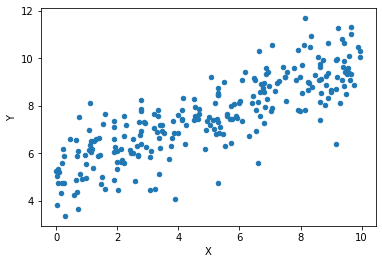

In [10]:
data.sample(n=250).plot(kind='scatter', x = 'X', y= 'Y')

In [11]:
np.random.rand(2)

array([0.96454639, 0.86762514])

In [12]:
m = tf.Variable(0.87)

In [13]:
b = tf.Variable(0.30)

In [14]:
batchsize = 8

In [15]:
xph = tf.placeholder(tf.float32, [batchsize])

In [16]:
yph = tf.placeholder(tf.float32, [batchsize])

In [17]:
y_hat = (m*xph) + b

In [18]:
error = tf.reduce_sum(tf.square(yph-y_hat))

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

In [20]:
train = optimizer.minimize(error)

In [21]:
sess = tf.InteractiveSession()

In [22]:
batches = 10000

In [23]:
sess.run(tf.global_variables_initializer())

In [24]:
for i in range(1000):
    batch_idx = np.random.randint(len(x_data), size = batchsize)
    sess.run(train, feed_dict = {xph: x_data[batch_idx], yph: y_data[batch_idx]})

In [25]:
m,b = sess.run([m,b])

In [26]:
print(m) # Close ot 0.5 -- out training data slop(m)

0.5552392


In [27]:
print(b) # Close ot 5 -- out training data intercept(b)

4.866522


In [28]:
y_hat = x_data * m + b

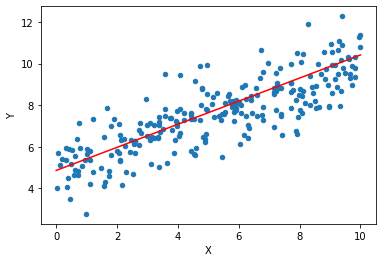

In [29]:
data.sample(n=250).plot(kind='scatter', x = 'X', y= 'Y')
plt.plot(x_data,y_hat, 'r')